In [1]:
# Just the normal prequisites for using matplotlib and numpy in a Jupyter notebook
%matplotlib inline
# Use the svg backend, in my opinion it just makes better looking plots
%config InlineBackend.figure_format = 'svg'

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging( logging_level='DEBUG')

import os
import sys
from pathlib import Path
import IPython
from scipy import signal
import scipy.fftpack
from PySpice.Unit import *
from PySpice.Spice.Parser import SpiceParser
from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Probe.Plot import plot
from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Math import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import unittest

directory_path = Path(os.path.abspath('')).resolve().parent.parent
spice_libraries_path = directory_path.joinpath("lib", "spice")
spice_library = SpiceLibrary(spice_libraries_path)

directory_path = Path(os.path.abspath('')).resolve()

2020-12-12 13:27:13,393 - PySpice.Spice.Netlist.__new__ - DEBUG - Element don't define a __pins__ attribute
2020-12-12 13:27:13,396 - PySpice.Spice.Netlist.__new__ - DEBUG - FixedPinElement don't define a __pins__ attribute
2020-12-12 13:27:13,400 - PySpice.Spice.Netlist.__new__ - DEBUG - SubCircuitElement don't define a __pins__ attribute
2020-12-12 13:27:13,402 - PySpice.Spice.Netlist.__new__ - DEBUG - Resistor don't define a __pins__ attribute
2020-12-12 13:27:13,407 - PySpice.Spice.Netlist.__new__ - DEBUG - SemiconductorResistor don't define a __pins__ attribute
2020-12-12 13:27:13,408 - PySpice.Spice.Netlist.__new__ - DEBUG - BehavioralResistor don't define a __pins__ attribute
2020-12-12 13:27:13,410 - PySpice.Spice.Netlist.__new__ - DEBUG - Capacitor don't define a __pins__ attribute
2020-12-12 13:27:13,412 - PySpice.Spice.Netlist.__new__ - DEBUG - SemiconductorCapacitor don't define a __pins__ attribute
2020-12-12 13:27:13,413 - PySpice.Spice.Netlist.__new__ - DEBUG - Behaviora

![module](https://img.shields.io/badge/module-vca-yellow) ![status](https://img.shields.io/badge/status-work%20in%20progress-orange)

## *übergang*

<a href="https://photos.app.goo.gl/pg6iZUC32rTKX5LC7"><img src="https://spielhuus.github.io/elektrophon/images/kontrast-logo-tmb.jpg" height="300px" align="right"></a>

***table of contents***

* [*about*](#about)
* [*construction*](#construction)
* [*calibration*](#calibration)
* [*usage*](#usage)
* [*credits*](#credits)
* [*links*](#links)
* [*changelog*](#changelog)
  
<br/><br/><br/><br/>

## *about*


In [2]:
#load the diffpair schema
kicad_netlist_path = directory_path.joinpath('main', 'main.cir')
parser = SpiceParser(path=str(kicad_netlist_path))

In [3]:
#simulate diffpair with envelope
scanner = parser.build_circuit(ground=5)
#scanner.include(spice_library['TL072'])
#scanner.include(spice_library['TL072c'])
scanner.include(spice_library['LT1014x_30V'])
scanner.include(spice_library['BC556B'])
#scanner.include(spice_library['BC857CW'])
scanner.include(spice_library['LM13700/NS'])
scanner.include(spice_library['LM13700d'])
scanner.include(spice_library['D1N4148'])
scanner.V('1', '+15V', scanner.gnd, 'DC 12')
scanner.V('2', '-15V', scanner.gnd, 'DC -12')
scanner.V('3', 'INPUT_A', scanner.gnd, 'DC 0V AC 0V SIN(0 10m 400)')
scanner.V('4', 'INPUT_B', scanner.gnd, 'DC 0V AC 0V SIN(0 10m 800)')
scanner.V('5', 'INPUT_C', scanner.gnd, 'DC 0V AC 0V SIN(0 10m 1200)')
scanner.V('6', 'INPUT_D', scanner.gnd, 'DC 0V AC 0V SIN(0 10m 1600)')
scanner.V('7', 'CV', scanner.gnd, 'DC 0V AC 0V PULSE(0V 5V 0 20m 0m 1u 20m)') 
simulator = scanner.simulator(temperature=25, nominal_temperature=25)
analysis_scanner = simulator.transient(step_time=1@u_us, end_time=20@u_ms)

2020-12-12 13:27:19,629 - PySpice.Spice.Parser.Element.build - DEBUG - R 6 ['Net-_R4-Pad2_', 'GND'] ['36k'] {}
2020-12-12 13:27:19,632 - PySpice.Spice.Parser.Element.build - DEBUG - R 4 ['Net-_R3-Pad2_', 'Net-_R4-Pad2_'] ['47k'] {}
2020-12-12 13:27:19,635 - PySpice.Spice.Parser.Element.build - DEBUG - R 3 ['Net-_R2-Pad2_', 'Net-_R3-Pad2_'] ['47k'] {}
2020-12-12 13:27:19,639 - PySpice.Spice.Parser.Element.build - DEBUG - R 2 ['Net-_R1-Pad2_', 'Net-_R2-Pad2_'] ['47k'] {}
2020-12-12 13:27:19,640 - PySpice.Spice.Parser.Element.build - DEBUG - R 1 ['+15V', 'Net-_R1-Pad2_'] ['300k'] {}
2020-12-12 13:27:19,644 - PySpice.Spice.Parser.Element.build - DEBUG - R 7 ['Net-_R12-Pad2_', 'CV'] ['47k'] {}
2020-12-12 13:27:19,646 - PySpice.Spice.Parser.Element.build - DEBUG - R 8 ['Net-_R13-Pad2_', 'CV'] ['47k'] {}
2020-12-12 13:27:19,655 - PySpice.Spice.Parser.Element.build - DEBUG - R 9 ['Net-_R14-Pad2_', 'CV'] ['47k'] {}
2020-12-12 13:27:19,658 - PySpice.Spice.Parser.Element.build - DEBUG - R 10 ['Ne

2020-12-12 13:28:10,869 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT
2020-12-12 13:28:10,886 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT
2020-12-12 13:28:10,897 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT
2020-12-12 13:28:10,911 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT
2020-12-12 13:28:10,927 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT
2020-12-12 13:28:10,937 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT
2020-12-12 13:28:10,951 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT
2020-12-12 13:28:10,964 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conver

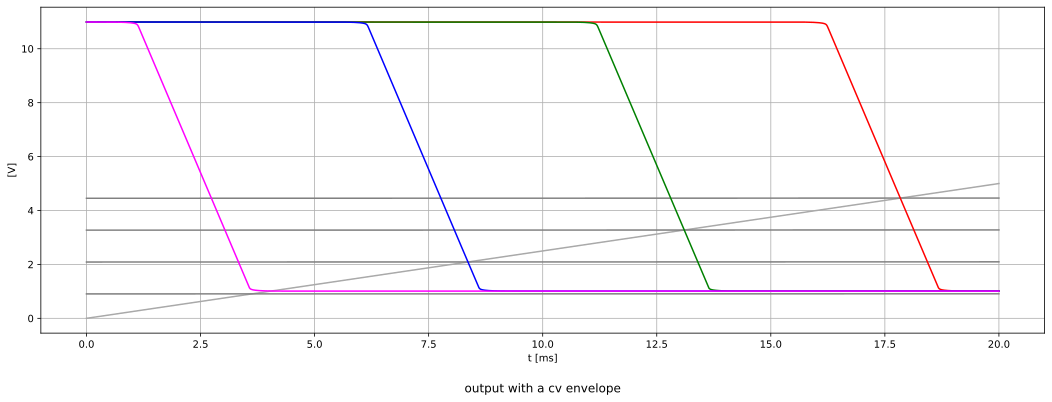

In [4]:
#plot the results
fig, ax0 = plt.subplots(figsize=(18, 6))

#plot with envelope
ax0.plot(analysis_scanner['CV'].abscissa*1000, analysis_scanner['CV'], c='DarkGrey')  # envelope input (scaled)

ax0.plot(analysis_scanner['Net-_R1-Pad2_'].abscissa*1000, analysis_scanner['Net-_R1-Pad2_'], c='Grey')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_R2-Pad2_'].abscissa*1000, analysis_scanner['Net-_R2-Pad2_'], c='Grey')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_R3-Pad2_'].abscissa*1000, analysis_scanner['Net-_R3-Pad2_'], c='Grey')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_R4-Pad2_'].abscissa*1000, analysis_scanner['Net-_R4-Pad2_'], c='Grey')  # envelope input (scaled)

ax0.plot(analysis_scanner['Net-_Q1-Pad2_'].abscissa*1000, analysis_scanner['Net-_Q1-Pad2_'], c='Red')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_Q4-Pad2_'].abscissa*1000, analysis_scanner['Net-_Q4-Pad2_'], c='Green')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_Q2-Pad2_'].abscissa*1000, analysis_scanner['Net-_Q2-Pad2_'], c='Blue')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_Q3-Pad2_'].abscissa*1000, analysis_scanner['Net-_Q3-Pad2_'], c='Magenta')  # envelope input (scaled)

#ax0.plot(analysis_scanner['Net-_Q1-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q1-Pad3_'], c='Red')  # envelope input (scaled)
#ax0.plot(analysis_scanner['Net-_Q4-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q4-Pad3_'], c='Green')  # envelope input (scaled)
#ax0.plot(analysis_scanner['Net-_Q2-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q2-Pad3_'], c='Blue')  # envelope input (scaled)
#ax0.plot(analysis_scanner['Net-_Q3-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q3-Pad3_'], c='Magenta')  # envelope input (scaled)

ax0.grid()
ax0.set_xlabel('t [ms]')
ax0.set_ylabel('[V]')
ax0.set_title('output with a cv envelope', y=-0.2)

plt.show()


2020-12-12 13:28:13,482 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT
2020-12-12 13:28:13,490 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT
2020-12-12 13:28:13,502 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT
2020-12-12 13:28:13,515 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT


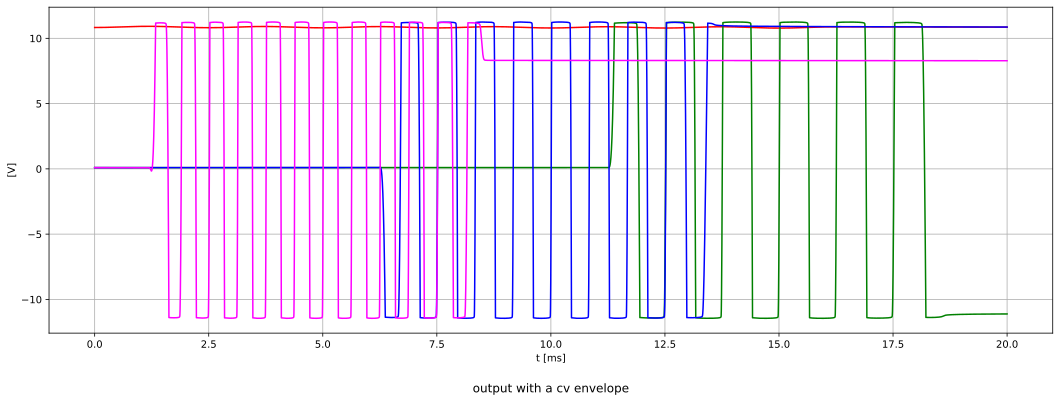

In [5]:
#plot the results
fig, ax0 = plt.subplots(figsize=(18, 6))

#plot with envelope
ax0.plot(analysis_scanner['NC_15'].abscissa*1000, analysis_scanner['NC_15'], c='Red')  # envelope input (scaled)
ax0.plot(analysis_scanner['NC_14'].abscissa*1000, analysis_scanner['NC_14'], c='Green')  # envelope input (scaled)
ax0.plot(analysis_scanner['NC_13'].abscissa*1000, analysis_scanner['NC_13'], c='Blue')  # envelope input (scaled)
ax0.plot(analysis_scanner['NC_16'].abscissa*1000, analysis_scanner['NC_16'], c='Magenta')  # envelope input (scaled)

ax0.grid()
ax0.set_xlabel('t [ms]')
ax0.set_ylabel('[V]')
ax0.set_title('output with a cv envelope', y=-0.2)

plt.show()

2020-12-12 13:28:15,846 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT
2020-12-12 13:28:15,860 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT
2020-12-12 13:28:15,869 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT
2020-12-12 13:28:15,886 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - DEBUG - Conversion for <ufunc 'multiply'> is NEW_UNIT


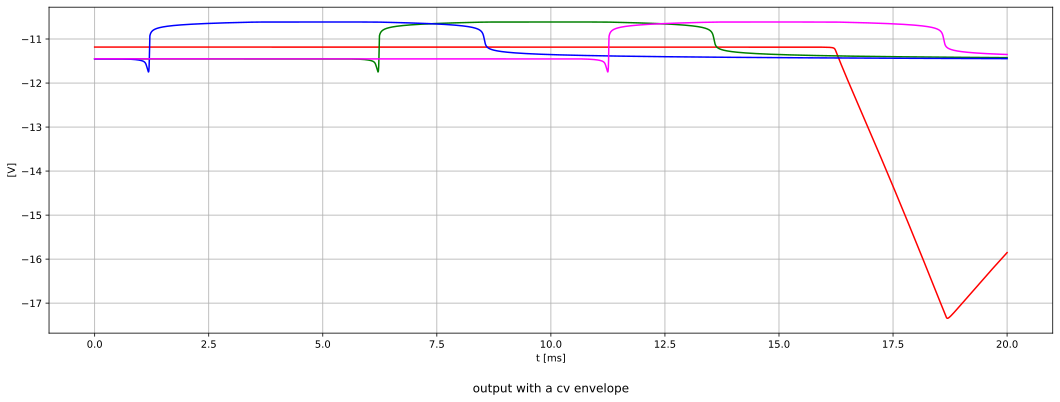

In [6]:
#plot the results
fig, ax0 = plt.subplots(figsize=(18, 6))

#plot with envelope
ax0.plot(analysis_scanner['Net-_Q1-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q1-Pad3_'], c='Red')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_Q2-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q2-Pad3_'], c='Green')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_Q3-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q3-Pad3_'], c='Blue')  # envelope input (scaled)
ax0.plot(analysis_scanner['Net-_Q4-Pad3_'].abscissa*1000, analysis_scanner['Net-_Q4-Pad3_'], c='Magenta')  # envelope input (scaled)

ax0.grid()
ax0.set_xlabel('t [ms]')
ax0.set_ylabel('[V]')
ax0.set_title('output with a cv envelope', y=-0.2)

plt.show()

## *construction*

for the final circuit input and output buffering and biasing is needed. the buffering is done with opamps. 


first we design the input stage. the input voltage for the X signal should be 10mV and 20mV for the control voltage.


## *references*

- [Muffwigler][1] thread with schematic from electrouwe

[1]: https://www.muffwiggler.com/forum/viewtopic.php?f=17&t=241171&start=25


